In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv('./test_forest.csv')
train = pd.read_csv('./train_forest.csv')


In [4]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df = train

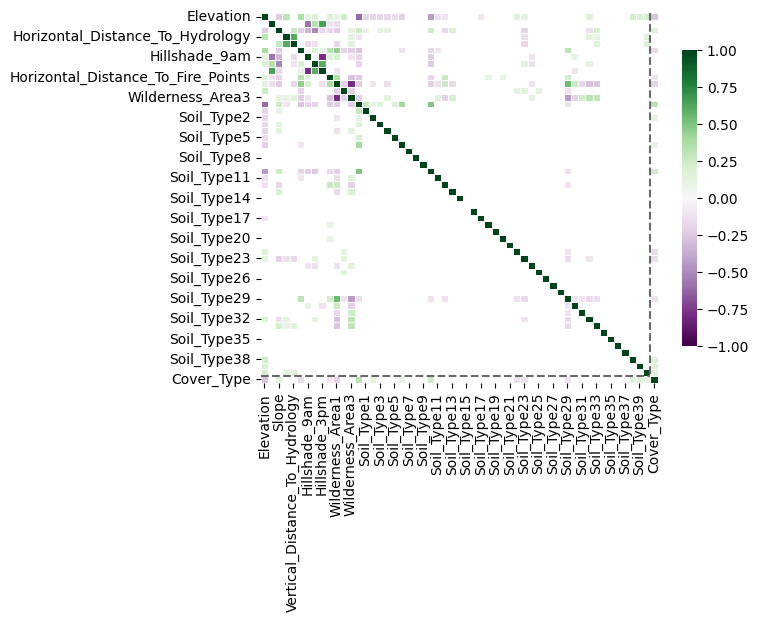

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Création d'un masque pour les faibles corrélations (par exemple, valeurs proches de zéro)
mask = np.abs(corr_matrix) < 0.1  # Ajuste le seuil selon le niveau de corrélation "faible" que tu souhaites

# Choix de la palette de couleurs
palette = 'PRGn'

fig, ax = plt.subplots(1, 1)
sns.heatmap(corr_matrix, mask=mask, annot=False, vmin=-1, vmax=1, cmap=palette, ax=ax, 
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor="white")

# Ajustement des lignes pour les variables explicatives
nvarexp = df.shape[1] - 1
ax.plot([0, nvarexp], [nvarexp, nvarexp], linestyle='--', color='dimgray')
ax.plot([nvarexp, nvarexp], [0, nvarexp], linestyle='--', color='dimgray')

plt.show()


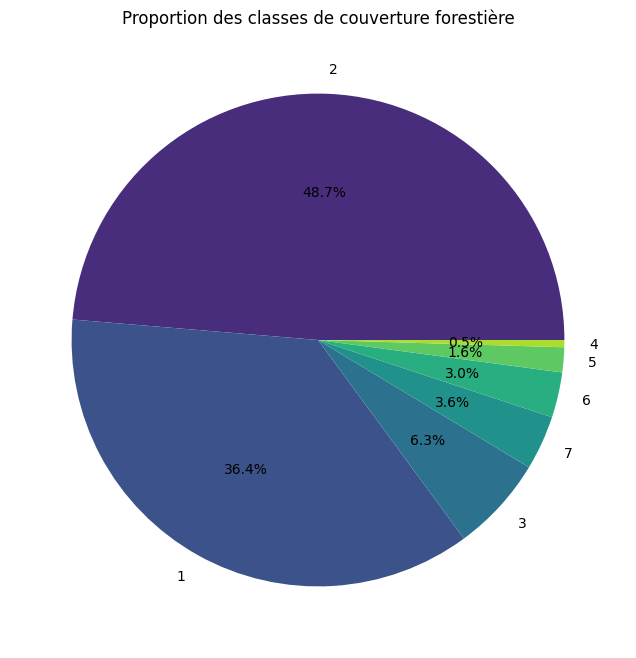

In [6]:
# Tracer un camembert
plt.figure(figsize=(8, 8))
df['Cover_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis", 7))
plt.ylabel('')
plt.title("Proportion des classes de couverture forestière")
plt.show()


/tmp/ipykernel_12538/2004268373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")


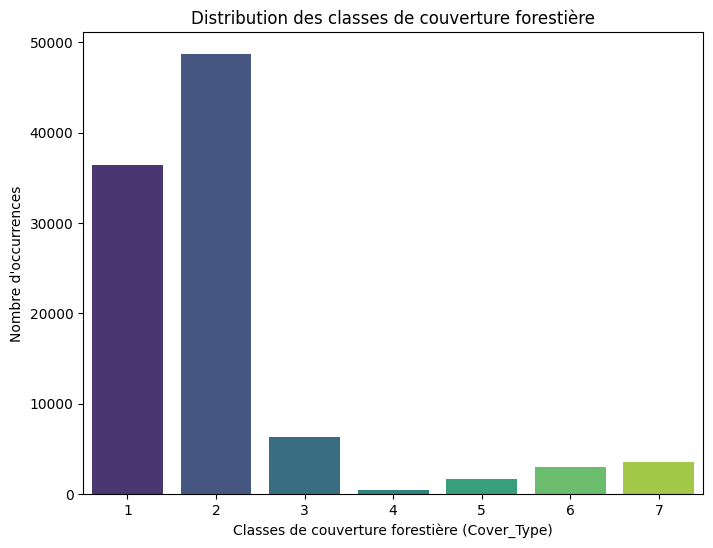

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les occurrences de chaque catégorie
count_data = df['Cover_Type'].value_counts()

# Tracer un graphique à barres
plt.figure(figsize=(8, 6))
sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")
plt.xlabel("Classes de couverture forestière (Cover_Type)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes de couverture forestière")
plt.show()


## Model fitting

In [6]:
from sklearn.model_selection import train_test_split

# Supposons que votre dataframe s'appelle df et que la colonne cible s'appelle 'Cover_Type'
X = df.drop('Cover_Type', axis=1)  # Variables explicatives
y = df['Cover_Type']  # Variable cible (Cover_Type avec 7 classes)

# Division avec stratification pour préserver les proportions des 7 classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Maintenant, X_train, X_test, y_train, y_test contiennent les données stratifiées

## Regression logistique


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialisation du modèle
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction
y_pred_logreg = logreg.predict(X_test)

# Évaluation
print("Régression Logistique - Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Régression Logistique - Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.69      0.68      7282
           2       0.70      0.81      0.75      9735
           3       0.62      0.62      0.62      1255
           4       0.64      0.19      0.30        94
           5       0.00      0.00      0.00       327
           6       0.14      0.02      0.03       593
           7       0.32      0.02      0.03       714

    accuracy                           0.68     20000
   macro avg       0.44      0.33      0.34     20000
weighted avg       0.65      0.68      0.66     20000



/home/sam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

## Arbre de decision

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle
dtree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dtree.fit(X_train, y_train)

# Prédiction
y_pred_dtree = dtree.predict(X_test)

# Évaluation
print("Arbre de Décision - Classification Report:")
print(classification_report(y_test, y_pred_dtree))


Arbre de Décision - Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      7282
           2       0.88      0.89      0.88      9735
           3       0.86      0.84      0.85      1255
           4       0.72      0.74      0.73        94
           5       0.64      0.65      0.64       327
           6       0.72      0.72      0.72       593
           7       0.86      0.86      0.86       714

    accuracy                           0.86     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.86      0.86      0.86     20000



## Bagging 

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle de bagging avec un arbre de décision comme classificateur de base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Entraînement du modèle
bagging.fit(X_train, y_train)

# Prédiction
y_pred_bagging = bagging.predict(X_test)

# Évaluation
print("Bagging - Classification Report:")
print(classification_report(y_test, y_pred_bagging))


Bagging - Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.91      0.92      7282
           2       0.92      0.95      0.93      9735
           3       0.91      0.92      0.91      1255
           4       0.88      0.82      0.85        94
           5       0.86      0.66      0.75       327
           6       0.88      0.82      0.85       593
           7       0.94      0.89      0.91       714

    accuracy                           0.92     20000
   macro avg       0.90      0.85      0.88     20000
weighted avg       0.92      0.92      0.92     20000



## Boosting

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle AdaBoost avec un arbre de décision comme classificateur de base
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Entraînement du modèle
adaboost.fit(X_train, y_train)

# Prédiction
y_pred_adaboost = adaboost.predict(X_test)

# Évaluation
print("Boosting (AdaBoost) - Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting (AdaBoost) - Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.59      0.62      7282
           2       0.72      0.76      0.74      9735
           3       0.86      0.16      0.28      1255
           4       0.04      0.02      0.03        94
           5       0.00      0.00      0.00       327
           6       0.27      0.60      0.37       593
           7       0.13      0.26      0.17       714

    accuracy                           0.62     20000
   macro avg       0.38      0.34      0.32     20000
weighted avg       0.65      0.62      0.62     20000



/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialisation du modèle Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
gradient_boosting.fit(X_train, y_train)

# Prédiction
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

# Évaluation
print("Boosting (Gradient Boosting) - Classification Report:")
print(classification_report(y_test, y_pred_gradient_boosting))


Boosting (Gradient Boosting) - Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.74      0.75      7282
           2       0.78      0.83      0.81      9735
           3       0.78      0.83      0.80      1255
           4       0.81      0.76      0.78        94
           5       0.78      0.27      0.40       327
           6       0.63      0.46      0.53       593
           7       0.87      0.68      0.76       714

    accuracy                           0.77     20000
   macro avg       0.77      0.65      0.69     20000
weighted avg       0.77      0.77      0.77     20000



In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Décaler les labels pour qu'ils commencent à 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialisation du modèle XGBoost
xgboost = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Entraînement du modèle
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost = xgboost.predict(X_test)

# Ajuster les prédictions en fonction des labels originaux
y_pred_xgboost_original = y_pred_xgboost + 1

# Évaluation
print("XGBoost - Classification Report:")
print(classification_report(y_test_adjusted, y_pred_xgboost))



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7282
           1       0.92      0.94      0.93      9735
           2       0.91      0.92      0.92      1255
           3       0.86      0.85      0.86        94
           4       0.85      0.69      0.76       327
           5       0.87      0.82      0.85       593
           6       0.95      0.90      0.93       714

    accuracy                           0.92     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.92      0.92      0.92     20000



## Random Forest 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialisation du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf.predict(X_test)

# Évaluation
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      7282
           2       0.89      0.94      0.92      9735
           3       0.88      0.92      0.90      1255
           4       0.94      0.77      0.84        94
           5       0.89      0.55      0.68       327
           6       0.85      0.75      0.80       593
           7       0.95      0.86      0.90       714

    accuracy                           0.90     20000
   macro avg       0.90      0.81      0.85     20000
weighted avg       0.90      0.90      0.90     20000



## hyper parametre

In [9]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Initialisation du modèle
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions et évaluation
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Lancer l'optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres:", study.best_params)


[I 2024-11-07 23:07:51,134] A new study created in memory with name: no-name-b2d99651-704c-47ce-881e-eb84e6b10f59
[I 2024-11-07 23:08:12,645] Trial 0 finished with value: 0.82755 and parameters: {'n_estimators': 146, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.82755.
[I 2024-11-07 23:08:41,084] Trial 1 finished with value: 0.89305 and parameters: {'n_estimators': 185, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.89305.
[I 2024-11-07 23:09:01,256] Trial 2 finished with value: 0.8901 and parameters: {'n_estimators': 132, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.89305.
[I 2024-11-07 23:09:12,618] Trial 3 finished with value: 0.89025 and parameters: {'n_estimators': 76, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.89305.
[I 2024-11-07 23:09:40,623] Trial 4 finished with value: 0.88015 an

Meilleurs paramètres: {'n_estimators': 192, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 1}


## Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Paramètres optimisés
best_params = {'n_estimators': 192, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Modèle avec les meilleurs paramètres
model_best = RandomForestClassifier(**best_params, random_state=42)

# Validation croisée avec les meilleurs paramètres
scores_best = cross_val_score(model_best, X_train, y_train, cv=5, scoring='accuracy')
print("Validation croisée avec les meilleurs paramètres:")
print(f"Scores: {scores_best}")
print(f"Score moyen: {scores_best.mean()}")

# Modèle avec les paramètres par défaut
model_default = RandomForestClassifier(random_state=42)

# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model_default, X_train, y_train, cv=5, scoring='accuracy')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les meilleurs paramètres:
Scores: [0.8928125 0.8880625 0.8940625 0.8959375 0.8938125]
Score moyen: 0.8929375

Validation croisée avec les paramètres par défaut:
Scores: [0.8911875 0.8886875 0.8905625 0.89525   0.8936875]
Score moyen: 0.891875


In [15]:
# Modèle XGBoost avec les paramètres spécifiés
xgboost = xgb.XGBClassifier(n_estimators=1000, random_state=42)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
# Validation croisée avec XGBoost
scores_xgboost = cross_val_score(xgboost, X_train, y_train_adjusted, cv=5, scoring='accuracy')
print("Validation croisée avec XGBoost:")
print(f"Scores: {scores_xgboost}")
print(f"Score moyen: {scores_xgboost.mean()}")

Validation croisée avec XGBoost:
Scores: [0.914     0.909375  0.9095625 0.912125  0.913125 ]
Score moyen: 0.9116375000000001


In [18]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Validation croisée avec Bagging
scores_bagging = cross_val_score(bagging, X_train, y_train, cv=5, scoring='accuracy')
print("\nValidation croisée avec Bagging:")
print(f"Scores: {scores_bagging}")
print(f"Score moyen: {scores_bagging.mean()}")



Validation croisée avec Bagging:
Scores: [0.9083125 0.902625  0.9085    0.908625  0.9091875]
Score moyen: 0.9074500000000001
